## Unveiling the Challenge: Predicting NBA Match Wins from Past Performance


In the world of NBA basketball, where excitement unfolds with every dribble and pass, predicting which team will win a game can feel like a tough puzzle. 

*In this work we try to understand how past performance might help predict future wins.*




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import teamgamelog

pd.set_option('display.max_columns', 500)

## Data collection

In [3]:
season = "2021-22"

In [4]:
# collect the NBA team-ids
team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]

team_ids = team_stats["TEAM_ID"]
team_stats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,43,39,0.524,3941.0,3401,7241,0.470,1056,2821,0.374,1485,1829,0.812,823,2783,3606,2017,972.0,587,348,367,1534,1668,9343,128.0,1,16,16,16,30,11,13,7,11,18,2,3,11,4,17,17,20,15,1,22,23,10,7,6,6,14
1,1610612738,Boston Celtics,82,51,31,0.622,3981.0,3341,7167,0.466,1085,3044,0.356,1397,1713,0.816,863,2915,3778,2036,1118.0,591,478,376,1521,1592,9164,597.0,1,6,6,6,2,13,18,15,8,9,14,14,24,2,11,4,5,14,13,19,2,11,5,20,12,2
2,1610612751,Brooklyn Nets,82,44,38,0.537,3951.0,3442,7251,0.475,940,2602,0.361,1434,1781,0.805,844,2796,3640,2071,1153.0,582,448,403,1670,1616,9258,64.0,1,14,14,14,19,5,12,4,24,28,10,10,14,6,14,15,13,10,17,24,5,21,22,16,9,15
3,1610612766,Charlotte Hornets,82,43,39,0.524,3976.0,3508,7497,0.468,1143,3130,0.365,1298,1753,0.740,888,2767,3655,2302,1087.0,707,402,377,1629,1609,9457,36.0,1,16,16,16,3,4,3,11,5,6,6,25,19,27,9,21,12,1,10,5,11,12,18,18,4,16
4,1610612741,Chicago Bulls,82,46,36,0.561,3946.0,3422,7127,0.480,872,2364,0.369,1436,1766,0.813,711,2760,3471,1958,1053.0,585,336,410,1540,1489,9152,-32.0,1,12,12,12,24,7,20,3,29,30,4,9,17,3,29,22,28,19,6,23,25,24,8,28,13,20
5,1610612739,Cleveland Cavaliers,82,44,38,0.537,3946.0,3255,6940,0.469,953,2686,0.355,1376,1810,0.760,837,2786,3623,2064,1181.0,580,343,380,1433,1638,8839,174.0,1,14,14,14,24,21,29,9,20,22,15,18,12,21,16,16,15,11,22,26,24,15,1,11,25,13
6,1610612742,Dallas Mavericks,82,52,30,0.634,3951.0,3222,6982,0.461,1073,3063,0.350,1341,1739,0.771,759,2769,3528,1918,1025.0,552,325,300,1612,1645,8858,271.0,1,5,5,5,19,25,27,18,10,8,19,22,22,16,24,20,24,25,3,29,28,1,14,10,24,8
7,1610612743,Denver Nuggets,82,48,34,0.585,3961.0,3416,7079,0.483,1039,2944,0.353,1372,1725,0.795,752,2865,3617,2279,1189.0,592,305,392,1639,1632,9243,189.0,1,10,10,10,8,8,23,2,14,13,16,19,23,8,25,9,17,3,26,18,29,17,20,13,10,11
8,1610612765,Detroit Pistons,82,23,59,0.280,3956.0,3129,7267,0.431,925,2838,0.326,1413,1806,0.782,900,2625,3525,1924,1163.0,630,393,427,1799,1625,8596,-633.0,1,28,28,28,13,29,11,29,26,16,29,13,13,13,8,29,25,24,20,10,14,26,30,14,28,26
9,1610612744,Golden State Warriors,82,53,29,0.646,3946.0,3323,7087,0.469,1176,3231,0.364,1280,1665,0.769,800,2930,3730,2223,1221.0,719,372,317,1723,1474,9102,454.0,1,3,3,3,24,17,21,10,3,3,8,26,26,17,20,2,7,5,29,4,18,2,27,29,15,5


## Get all the season games

We use the nba_api package to get all the games played in season 20-21.

However, the dataset includes lots of unrelevant matches. There are 30 teams in the NBA each plays 82 regular season games. Hence we expect 82*20/2 = 1230 games, but we got 2091 games. 

In [5]:
# Create a LeagueGameFinder instance
game_finder = leaguegamefinder.LeagueGameFinder(season_nullable=season)

# Get the game data
game_data = game_finder.get_data_frames()[0]

# Extract game IDs
game_ids = game_data['GAME_ID'].tolist()
print("Number of games - ", len(game_ids))
print("Number of unique games - ", game_data['GAME_ID'].unique().shape[0])

Number of games -  4182
Number of unique games -  2091


# Data cleaning
## filter out pre-season and playoff games.

First we filter the data based on the regular season starting and ending dates.

the dates are extracted from - https://en.wikipedia.org/wiki/2021%E2%80%9322_NBA_season

In [6]:
regular_season_start_date = pd.to_datetime('2021-10-19')
regular_season_end_date = pd.to_datetime('2022-04-10')

In [189]:
# Convert GAME_DATE column to datetime
game_data['GAME_DATE'] = pd.to_datetime(game_data['GAME_DATE'])

# Filter regular season games
regular_season = (game_data['GAME_DATE'] >= regular_season_start_date) & \
                 (game_data['GAME_DATE'] <= regular_season_end_date)

In [190]:
game_data = game_data[regular_season]

There are 30 NBA teams that each play 82 games during the season. Hence, there should be 82*30 /2 = 1230 games in the dataset 

In [193]:
print("Number of unique games - ", game_data["GAME_ID"].unique().shape[0])

Number of unique games -  1930


In [194]:
# why there are more games than expected. Lets look on the number of teams in the dataset:

In [196]:
print("Number of teams in the NBA -", len(team_ids))
print("Number of teams in the games data frame - ", game_data["TEAM_ID"].unique().shape[0])

Number of teams in the NBA - 30
Number of teams in the games data frame -  68


In [198]:
# filter out any games of teams that are not from the NBA
game_data = game_data[game_data["TEAM_ID"].isin(team_logs.keys())]
print("Number of teams in the games data frame - ", game_data["TEAM_ID"].unique().shape[0])

In [249]:
game_data.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42021,1610612738,BOS,Boston Celtics,0042100406,2022-06-16,BOS vs. GSW,L,239,90,34,80,0.425,11,28,0.393,11,12,0.917,11,30,41,27,8,8,22,16,-13.0
1,42021,1610612744,GSW,Golden State Warriors,0042100406,2022-06-16,GSW @ BOS,W,241,103,38,92,0.413,19,46,0.413,8,8,1.000,15,29,44,27,13,7,15,20,13.0
2,42021,1610612744,GSW,Golden State Warriors,0042100405,2022-06-13,GSW vs. BOS,W,240,104,41,88,0.466,9,40,0.225,13,15,0.867,4,35,39,23,9,2,6,28,10.0
3,42021,1610612738,BOS,Boston Celtics,0042100405,2022-06-13,BOS @ GSW,L,238,94,31,75,0.413,11,32,0.344,21,31,0.677,8,39,47,18,2,2,18,16,-10.0
4,42021,1610612738,BOS,Boston Celtics,0042100404,2022-06-10,BOS vs. GSW,L,241,97,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,15,17,-10.0


In [201]:
# we want a dataframe that has one row per game 

In [202]:
def combine_team_games(df, keep_method='home'):
    '''Combine a TEAM_ID-GAME_ID unique table into rows by game. Slow.

        Parameters
        ----------
        df : Input DataFrame.
        keep_method : {'home', 'away', 'winner', 'loser', ``None``}, default 'home'
            - 'home' : Keep rows where TEAM_A is the home team.
            - 'away' : Keep rows where TEAM_A is the away team.
            - 'winner' : Keep rows where TEAM_A is the losing team.
            - 'loser' : Keep rows where TEAM_A is the winning team.
            - ``None`` : Keep all rows. Will result in an output DataFrame the same
                length as the input DataFrame.
                
        Returns
        -------
        result : DataFrame
    '''
    # Join every row to all others with the same game ID.
    joined = pd.merge(df, df, suffixes=['_A', '_B'],
                      on=['SEASON_ID', 'GAME_ID', 'GAME_DATE'])
    # Filter out any row that is joined to itself.
    result = joined[joined.TEAM_ID_A != joined.TEAM_ID_B]
    # Take action based on the keep_method flag.
    if keep_method is None:
        # Return all the rows.
        pass
    elif keep_method.lower() == 'home':
        # Keep rows where TEAM_A is the home team.
        result = result[result.MATCHUP_A.str.contains(' vs. ')]
    elif keep_method.lower() == 'away':
        # Keep rows where TEAM_A is the away team.
        result = result[result.MATCHUP_A.str.contains(' @ ')]
    elif keep_method.lower() == 'winner':
        result = result[result.WL_A == 'W']
    elif keep_method.lower() == 'loser':
        result = result[result.WL_A == 'L']
    else:
        raise ValueError(f'Invalid keep_method: {keep_method}')
    return result

In [204]:
# arrange the games data to have one row per game with the info from both teams combined and sorted by date

In [214]:
game_df = combine_team_games(game_data)

In [215]:
game_df = game_df.sort_values('GAME_DATE').reset_index(drop=True)

In [216]:
game_df

,SEASON_ID,TEAM_ID_A,TEAM_ABBREVIATION_A,TEAM_NAME_A,GAME_ID,GAME_DATE,MATCHUP_A,WL_A,MIN_A,PTS_A,...,FT_PCT_B,OREB_B,DREB_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PLUS_MINUS_B
0,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.565,5,39,44,19,3,9,12,17,-23.0
1,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.833,9,41,50,30,9,2,17,18,7.0
2,22021,1610612740,NOP,New Orleans Pelicans,0022100009,2021-10-20,NOP vs. PHI,L,240,97,...,0.800,6,41,47,24,9,5,12,11,20.0
3,22021,1610612762,UTA,Utah Jazz,0022100011,2021-10-20,UTA vs. OKC,W,240,107,...,0.611,15,35,50,19,4,2,14,15,-21.0
4,22021,1610612765,DET,Detroit Pistons,0022100004,2021-10-20,DET vs. CHI,L,241,88,...,0.867,9,39,48,18,8,5,17,19,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,22021,1610612753,ORL,Orlando Magic,0022101227,2022-04-10,ORL vs. MIA,W,239,125,...,0.750,10,37,47,20,5,4,10,13,-14.0
1226,22021,1610612756,PHX,Phoenix Suns,0022101229,2022-04-10,PHX vs. SAC,L,240,109,...,0.733,2,38,40,26,9,7,14,18,7.0
1227,22021,1610612763,MEM,Memphis Grizzlies,0022101223,2022-04-10,MEM vs. BOS,L,240,110,...,1.000,14,42,56,34,5,2,15,20,29.0
1228,22021,1610612740,NOP,New Orleans Pelicans,0022101225,2022-04-10,NOP vs. GSW,L,240,107,...,0.846,7,34,41,33,5,2,17,15,21.0


In [219]:
# ensure that there is one row per game
game_df["GAME_ID"].unique().shape

(1230,)

For each game in game_df:
* collect team performance for both teams
* keep label - W/L (format?)

For each game in game_df:
* collect performance of each team in prev games - average of individual measure. 
* add label 
* alternatively - measure the performance of the n-th players of each team.

# collect team performance during the season

Features to train on - 
* FG_PCT: Field Goal Percentage (FGM/FGA)
* FG3_PCT: Three-Point Field Goal Percentage (FG3M/FG3A)
* FT_PCT: Free Throw Percentage (FTM/FTA)
* OREB: Offensive Rebounds
* DREB: Defensive Rebounds
* AST: Assists
* STL: Steals
* BLK: Blocks
* TOV: Turnovers
* PF: Personal Fouls
* PTS: Total Points

In [218]:
columns = ["FG_PCT", "FG3_PCT", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

team_logs = {}
for team_id in team_ids:
    team_game_log = teamgamelog.TeamGameLog(team_id=team_id, season=season)

    # Get the team game log data
    team_game_log_data = team_game_log.get_data_frames()[0]
    team_game_log_data['GAME_DATE'] = pd.to_datetime(team_game_log_data['GAME_DATE'])

    team_game_log_data = team_game_log_data.sort_values(by='GAME_DATE', ascending=True).reset_index()
    team_game_log_data[columns] = team_game_log_data[columns].expanding().mean()
    
    team_logs[team_id] = team_game_log_data

In [60]:
team_logs[team_ids[3]]

,index,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,81,1610612766,0022100003,2021-10-20,CHA vs. IND,W,1,0,1.000,240,...,0.667000,12.000000,34.000000,46,29.000000,9.000000,5.000000,8.000000,21.000000,123.000000
1,80,1610612766,0022100017,2021-10-22,CHA @ CLE,W,2,0,1.000,240,...,0.745500,11.500000,34.500000,46,30.500000,11.000000,3.000000,13.000000,18.500000,123.000000
2,79,1610612766,0022100035,2021-10-24,CHA @ BKN,W,3,0,1.000,240,...,0.760000,11.000000,35.666667,48,29.000000,10.666667,3.666667,12.666667,18.000000,119.000000
3,78,1610612766,0022100041,2021-10-25,CHA vs. BOS,L,3,1,0.750,265,...,0.730750,11.750000,36.250000,52,28.250000,9.000000,4.250000,13.000000,19.750000,121.500000
4,77,1610612766,0022100055,2021-10-27,CHA @ ORL,W,4,1,0.800,240,...,0.751200,11.400000,35.000000,40,27.000000,10.000000,4.200000,13.600000,18.600000,121.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4,1610612766,0022101161,2022-04-02,CHA @ PHI,L,40,38,0.513,240,...,0.739577,10.923077,33.717949,32,27.833333,8.679487,4.820513,12.692308,19.910256,114.833333
78,3,1610612766,0022101181,2022-04-05,CHA @ MIA,L,40,39,0.506,240,...,0.739354,10.873418,33.594937,31,27.911392,8.670886,4.797468,12.696203,19.886076,114.835443
79,2,1610612766,0022101196,2022-04-07,CHA vs. ORL,W,41,39,0.513,240,...,0.739375,10.862500,33.750000,56,27.925000,8.675000,4.862500,12.675000,19.850000,115.000000
80,1,1610612766,0022101208,2022-04-08,CHA @ CHI,W,42,39,0.519,240,...,0.742593,10.827160,33.703704,38,28.000000,8.654321,4.851852,12.654321,19.864198,115.222222


# collect features for each game 

In [257]:
game_featues = []
for index, game in game_df.iterrows():
    team_a = game["TEAM_ID_A"]
    if not team_a in team_logs.keys():
        continue # apperantly there are games in 
    
    team_b = game["TEAM_ID_B"]
    game_id = game["GAME_ID"]
    
    feat_index_a = team_logs[team_a][team_logs[team_a]["Game_ID"] == game_id].index[0] # - 1
    feat_index_b = team_logs[team_b][team_logs[team_b]["Game_ID"] == game_id].index[0] # - 1

    if feat_index_a >= 0 and feat_index_b >= 0:
        # print(game)

        feat_a = team_logs[team_a].loc[feat_index_a][columns]
        feat_b = team_logs[team_b].loc[feat_index_b][columns]
        
        feat_a = feat_a.rename(lambda x: x + '_A')
        feat_b = feat_b.rename(lambda x: x + '_B')

        feat = pd.concat([feat_a, feat_b], axis=0)
        
        # add label - 1 = team-a won
        feat["label"] = int(game["WL_A"] == "W")
        feat["GAME_ID"] = game_id
        feat["GAME_DATE"] = game["GAME_DATE"]
        game_featues.append(feat)
        
df = pd.DataFrame(game_featues).reset_index(drop=True)

In [258]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [259]:
df.head()

,FG_PCT_A,FG3_PCT_A,FT_PCT_A,OREB_A,DREB_A,AST_A,STL_A,BLK_A,TOV_A,PF_A,PTS_A,FG_PCT_B,FG3_PCT_B,FT_PCT_B,OREB_B,DREB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PTS_B,label,GAME_ID,GAME_DATE
0,0.457,0.378,0.778,13.0,41.0,25.0,8.0,9.0,7.0,19.0,127.0,0.440,0.531,0.565,5.0,39.0,19.0,3.0,9.0,12.0,17.0,104.0,1,0022100001,2021-10-19
1,0.474,0.357,0.474,5.0,40.0,21.0,7.0,4.0,17.0,25.0,114.0,0.441,0.359,0.833,9.0,41.0,30.0,9.0,2.0,17.0,18.0,121.0,0,0022100002,2021-10-19
2,0.419,0.433,0.667,10.0,34.0,28.0,5.0,6.0,13.0,16.0,97.0,0.518,0.520,0.800,6.0,41.0,24.0,9.0,5.0,12.0,11.0,117.0,0,0022100009,2021-10-20
3,0.440,0.298,0.867,12.0,41.0,18.0,6.0,5.0,10.0,19.0,107.0,0.374,0.200,0.611,15.0,35.0,19.0,4.0,2.0,14.0,15.0,86.0,1,0022100011,2021-10-20
4,0.400,0.214,0.769,11.0,36.0,17.0,7.0,5.0,16.0,16.0,88.0,0.430,0.304,0.867,9.0,39.0,18.0,8.0,5.0,17.0,19.0,94.0,0,0022100004,2021-10-20


In [256]:
df.shape

(1230, 26)

# split data to train/test sets

In [221]:
N = df.shape[0]

In [222]:
train_df = df.loc[:int(0.8*N)]
test_df = df.loc[int(0.8*N)+1 :]

In [223]:
y_train = train_df["label"]
X_train = train_df.drop(columns=["index", "label", "GAME_ID", "GAME_DATE"])

y_test = test_df["label"]
X_test = test_df.drop(columns=["index", "label", "GAME_ID", "GAME_DATE"])

In [228]:
from sklearn.preprocessing import StandardScaler
# feature scaling 
# Instantiate the StandardScaler
scaler = StandardScaler()

In [229]:
X_train = scaler.fit_transform(X_train)

In [231]:
X_test = scaler.transform(X_test)

## the data set for classification - 
* for each game in game_df
* if its not the 1st game of any team - 
    - team-a collect the perfoemance features from the prev game (from the team_logs df)
    - team-b collect the perfoemance features from the prev game (from the team_logs df)
    - collect the label - 1 = team-a won, 0 team-b won
    - arrange in a new dataframe - [game_id, date(?), label, team-a-features, team-b-features]
* split to train/validation/test - for simplicity - train/test (maybe test will consist of the last 20% games)
* feature scaling (?)
* fit a model
* test and visualize the performance


# Train the model

In [232]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create the Random Forest model (robust to scaling)
rf_model = RandomForestClassifier(random_state=42)

# Create the XGBoost model (sensitive to scaling)
xgb_model = XGBClassifier(random_state=42)

# Define the scoring metrics dictionary
scoring = {
    "AUC": "roc_auc",
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1_score": make_scorer(f1_score)
}

# Perform cross-validation and compute scores for Random Forest
rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, return_estimator=True)
rf_models = rf_scores.pop("estimator")

# Perform cross-validation and compute scores for XGBoost
xgb_scores = cross_validate(xgb_model, X_train, y_train, cv=5, scoring=scoring, return_estimator=True)
xgb_models = xgb_scores.pop("estimator")

# Print the mean scores for each metric
print("Random Forest Scores:")
for metric, scores in rf_scores.items():
    print(f"{metric}: {scores.mean()}")

print("\nXGBoost Scores:")
for metric, scores in xgb_scores.items():
    print(f"{metric}: {scores.mean()}")


Random Forest Scores:
fit_time: 0.16094050407409669
score_time: 0.008722019195556641
test_AUC: 0.6852372034956304
test_Accuracy: 0.6324873096446699
test_Precision: 0.6494037909471313
test_Recall: 0.7166666666666666
test_F1_score: 0.6809942417933131

XGBoost Scores:
fit_time: 0.12779197692871094
score_time: 0.003843402862548828
test_AUC: 0.6878693300041615
test_Accuracy: 0.6365482233502539
test_Precision: 0.6508352451216386
test_Recall: 0.7296296296296296
test_F1_score: 0.6872977227521082


In [233]:
preds = []
for model in xgb_models:
    pred = model.predict(X_test)
    preds.append(pred)

y_pred = np.stack(preds).mean(axis=0)

In [234]:
# compute scores
acc = accuracy_score(y_test, y_pred > 0.5, normalize=False)
auc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred > 0.5)
recall = recall_score(y_test, y_pred > 0.5)
f1 = f1_score(y_test, y_pred > 0.5)

print("Test performance:")
print("Accuracy: ", acc/y_pred.shape[0])
print("AUC: ", auc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1 score: ", f1)


Test performance:
Accuracy:  0.6326530612244898
AUC:  0.6967722534081796
Precision:  0.6181818181818182
Recall:  0.7906976744186046
F1 score:  0.693877551020408


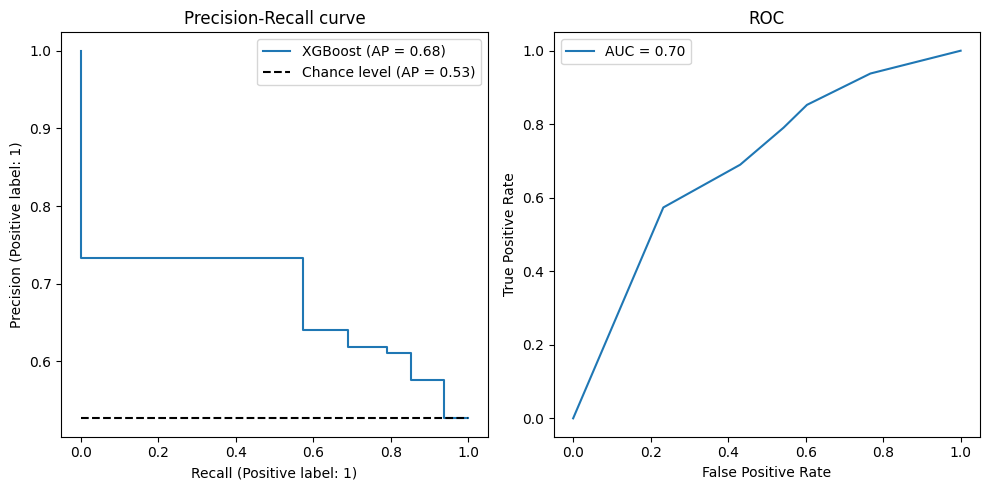

In [282]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fig, axes = plt.subplots(1,2, figsize=(10, 5))

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="XGBoost", plot_chance_level=True, ax=axes[0])
axes[0].legend()

_ = display.ax_.set_title("Precision-Recall curve")


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(axes[1])
axes[1].set_title("ROC")
plt.legend()
plt.tight_layout()

# train with all the training data

In [261]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [269]:
pred = xgb_model.predict_proba(X_test)[:,1]

In [270]:
# compute scores
acc = accuracy_score(y_test, pred > 0.5, normalize=False)
auc = roc_auc_score(y_test, pred)
prec = precision_score(y_test, pred > 0.5)
recall = recall_score(y_test, pred > 0.5)
f1 = f1_score(y_test, pred > 0.5)

print("Test performance:")
print("Accuracy: ", acc/y_pred.shape[0])
print("AUC: ", auc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1 score: ", f1)


Test performance:
Accuracy:  0.6244897959183674
AUC:  0.6996124031007752
Precision:  0.6241610738255033
Recall:  0.7209302325581395
F1 score:  0.6690647482014387


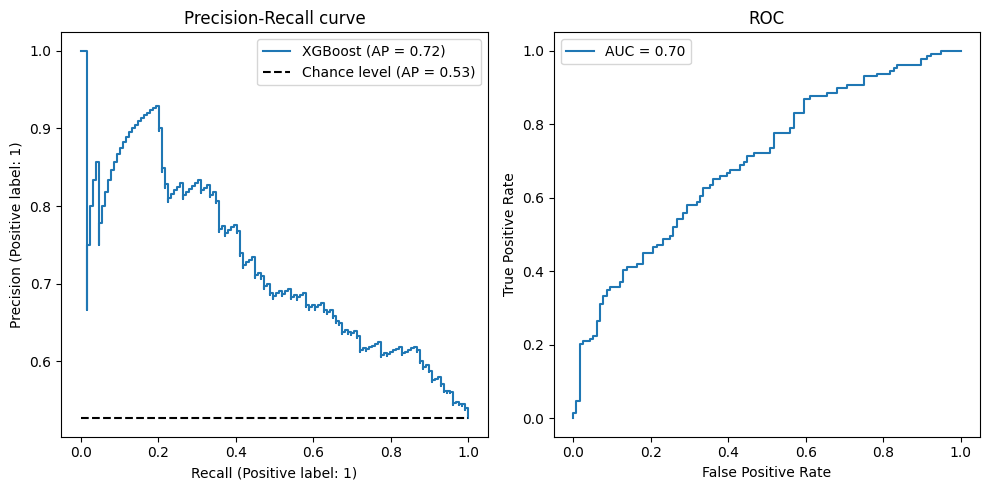

In [283]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

display = PrecisionRecallDisplay.from_predictions(
    y_test, pred, name="XGBoost", plot_chance_level=True, ax=axes[0])
axes[0].legend()

_ = display.ax_.set_title("Precision-Recall curve")


fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(axes[1])
axes[1].set_title("ROC")
plt.legend()
plt.tight_layout()